This assignment mixes theory and application, in the form of two problems. Perform the tasks described in each. Note that this (and other) assignments includes a few challenging research-related tasks. They are aimed at gradually building your capacity to tackle complex topics, familiarize yourself with academic discourse, and provide context and practice for the skills you will eventually need when working on your capstone thesis or project.  

### Part 1 - Theory 

1. You have a choice of handling a binary classification task using number of misclassifications as the performance measure and maximizing the margin between the two classes as the performance measure. On what factors does your decision depend? Provide a formal explanation, supported by theorems and ideas presented in the readings associated with this topic. 
 

2. You have a choice of handling a binary classification task using (i) linear SVM, and (ii) perceptron algorithm. On what factors does your decision depend? Provide a formal explanation, supported by theorems and ideas presented in the readings associated with this topic. 
 

### Part 2 - Application 

The sinc function is one of the commonly used datasets for testing nonlinear regression algorithms. This function is given by the following equation: 



sinc(x)=sinπx/πx
 

Familiarize yourself with the SVM tools in Python, which can be found within your topic materials.  

 

Create a Jupyter notebook and implement the following (in Python): 
 

1. Generate 50 data points from this function in the range [– 3, 3].  

2. Add Gaussian noise to the data. 

3. Train an SVM regressor with the data generated in (a). Define (and explain) suitable parameters required for training the regressor.  

4. Describe the functionality of the regressor. 

5. Discuss the potential use of the regressor and quantify its accuracy. 

 

After you assess the importance and approach to using the sinc function in conjunction with SVM, refer to "A Signal Theory Approach to Support Vector Classification: The Sinc Kernel" within your topic materials. You are not expected to grasp all the concepts and theorems described in the article, but skim through it on a high level, to get some insight into the work it describes. Upon skimming through the article, expand your discussion in (e) above, to include some of the relevant points. 

#### Part 1.1

Support vector machines maximize the distance between two closest opposite sample points and will use kernel functions to project the sample points to high dimension space to make them linearly separable. With the given task of measuring the performance on maximizing the margin between the classes running a support vector machine makes the most sense. When executing this, it is critical to get the correct kernel for the given data set. Below, in the application section of the assignment, we can see how important it is to select the correct kernel. Keeping all other parameters the same, the accuracy of classifying, or predicting, the data points is drastically different based on the kernel used. There are several kernels that can be applied to support vector machines, among those are graph kernels which include "three major groups in graph kernels: kernels based on walks and paths, kernels based on limited-size subgraphs, and kernels based on subtree patterns" (Kang). This is just one section of hundreds of other kernels to be leveraged based on the given data set.

#### Part 1.2

I will first lay out the differences between the perceptron and the support vector machine. The perceptron does not try to optimize the separation distance and is good to find a hyperplane that separates the two sets. Support vector machines on the other hand tries to maximize the support vector, or in other words, the distance between two closest opposite sample points. Support vector machines will use kernel functions to project the sample points to high dimension space to make them linearly separable, while the perceptron assumes the sample points are linearly separable. These ideas are supported by the author Hanselmann (2001) cited below. Now with these differences if the goal is to gain and measure accuracy on the margin between the two classes then a support vector machine would work best in that scenario. 

#### Part 2.1 - 2.2

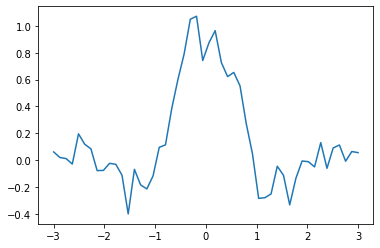

In [1]:
import numpy as np
import pandas as pd 
import random
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from IPython.display import Image

mu = 0
sigma = 0.1
noise = np.random.normal(mu, sigma, 50)

x = np.linspace(-3,3,50) 
y = np.sinc(x)
y_noise = y + noise

plt.plot(x,y_noise)
plt.show()

#### Part 2.3

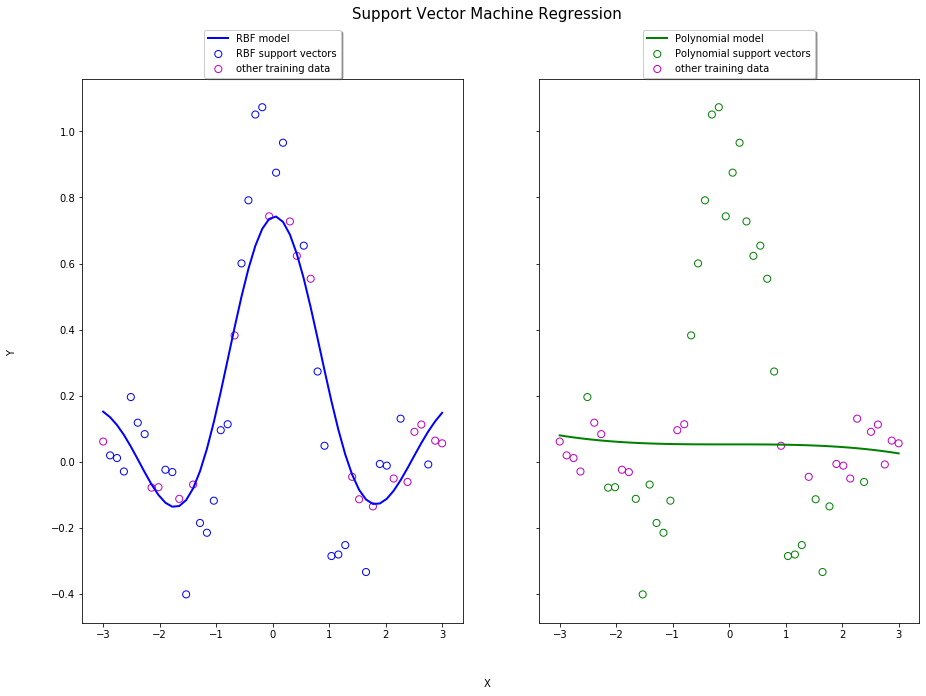

In [2]:
y_noise = y_noise.reshape((50,))
X = x.reshape(-1,1)

svr_rbf = SVR(kernel='rbf')
svr_poly = SVR(kernel='poly')

lw = 2
svrs = [svr_rbf, svr_poly]
kernel_label = ['RBF', 'Polynomial']
model_color = ['b', 'g']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X, y_noise).predict(X), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], y_noise[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     y_noise[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="m", s=50,
                     label='other training data')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)
fig.text(0.5, 0.04, 'X', ha='center', va='center')
fig.text(0.06, 0.5, 'Y', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Machine Regression", fontsize=15)
plt.show()

#### Part 2.4 -  2.5


Out of the two regressors the RBF kernel provided the best result- it was able to follow the Sinc function almost visually perfectly. The mathematical equations for the two kernels are cited below (Gopal, 2019, p.171). The score of these two regressors, using two different kernels, are shown below. I had a hypothesis that the polynomial kernel would do a better job since it can handle nonlinearity but did not do as good of a job as the RBF kernel. While using the base, or default, parameters for the support vector machine regressors it provided fairly accurate results with the RBF kernel. I would imagine in a future iteration to run a grid search with cross validation to optimize all other hyper parameters in order to get those tuned and optimized for the sinc function data set. This regressor, with RBF kernel, does a great job predicting on data that oscillates similar to the sinc function. In any data set that follows a pattern we can leverage this regressor and this kernel in order to make accurate predictions. 


One interesting example from the assigned article, "A Signal Theory Approach to Support Vector Classification: The Sinc Kernel", shows how the support vector machine regressor leveraged the rbf kernel and sinc function to predict on the given signal theory. "We propose a principled means to estimate a search space wherein the optimal parameter lies. Rather than blindly searching for a set of parameters by induction alone, we follow an approach inspired by the engineering discipline of filter design, catalogued by such works as Oppenheim and Schafer (1989). Although filter design is sometimes glibly described as 'more of an art than a science', it has a successful theoretical and practical history that arguably stretches further back than statistical machine learning. Not only does signal theory suggest parameters a priori, it can also (via spectral analysis) aid the interpretation of the underlying properties of a particular solution" (Nelson, 2009). The results show that the SVM classification machine learning problem can be tackled in the context of signal theory. The interconnection between Paley Wiener spaces and the sinc kernel have been exploited to form an explicit relationship between the information model and the sinc kernel hyper-parameter. By employing some recent work on sequency analysis, it has been shown that the nature of the model can be discerned and classified.

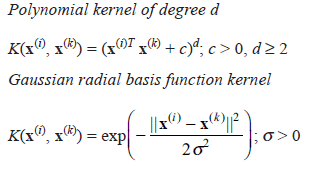

In [3]:
Image(filename = 'kernels_form.png')

In [4]:
print('RBF Score: ', svr_rbf.score(X,y_noise))
print('Poly Score: ', svr_poly.score(X,y_noise))

RBF Score:  0.7894964321781661
Poly Score:  -0.07091841686325262


### References:

Gopal, M. (2019). Applied machine learning. New York: McGraw-Hill Education. 


Kang, Tong, &amp; Sun. (n.d.). Fast Random Walk Graph Kernel. Retrieved from http://www.cs.cmu.edu/~ukang/papers/fast_rwgk.pdf


Nelson, J. D., Damper, R. I., Gunn, S. R., &amp; Guo, B. (2009). A signal theory approach to support vector classification: The sinc kernel. Neural Networks, 22(1), 49-57. doi:10.1016/j.neunet.2008.09.016


S. (2020). Support Vector Regression (SVR) using linear and non-linear kernels. Retrieved from https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html?fbclid=IwAR0JP8vlemRKjl3LKufhEHUTR6G46Tjk3JLJyF_mUqDzCiqJGOTOlyLMafQ


T. Hanselmann and L. Noakes. (2001). "Comparison between support vector algorithm and algebraic perceptron," IJCNN'01. International Joint Conference on Neural Networks. Proceedings (Cat. No.01CH37222). Washington, DC, USA, 2001. pp. 1459-1463 vol.2. doi: 10.1109/IJCNN.2001.939577.
